Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB
None

Preview of Dataset:
                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      

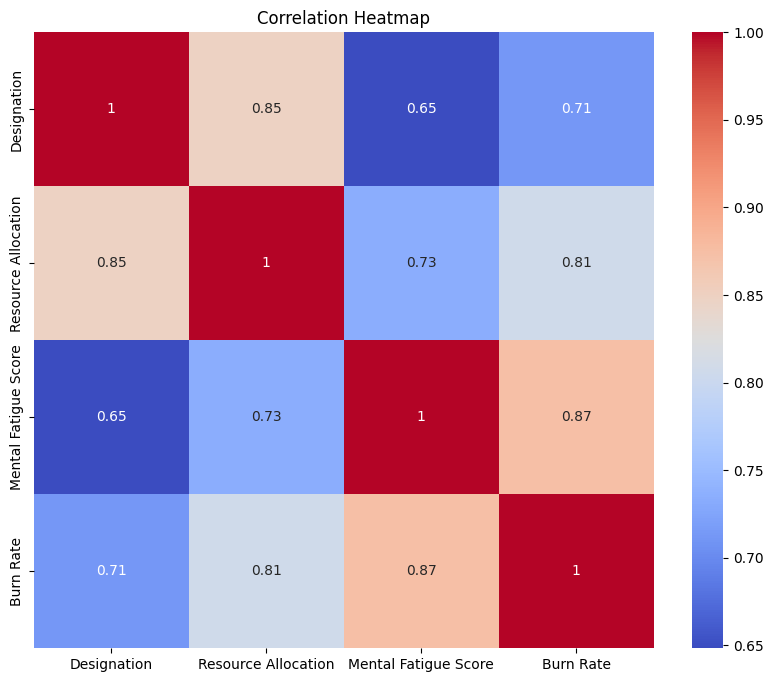


Updated Dataset with Formatted and Sorted Dates:
                Employee ID Date of Joining  Gender Company Type  \
0  fffe31003600390032003300      01-01-2008    Male      Product   
1  fffe33003200380032003000      01-01-2008  Female      Product   
2  fffe33003400380032003200      01-01-2008    Male      Service   
3      fffe3600330030003400      01-01-2008    Male      Product   
4  fffe33003300340038003900      01-01-2008  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            4                  7.0                   7.7   
1                  No            2                  3.0                   3.7   
2                  No            3                  6.0                   6.9   
3                 Yes            0                  1.0                   3.1   
4                  No            3                  5.0                   5.2   

   Burn Rate  
0       0.65  
1       0.16  
2       0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")
print("Initial Dataset Info:")
print(df.info())
print("\nPreview of Dataset:")
print(df.head())
print("\nMissing Values Count Before Filling:")
print(df.isnull().sum())
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
print("\nMissing Values Count After Filling:")
print(df.isnull().sum())
if 'Date of Joining' in df.columns:
    df['Date of Joining'] = pd.to_datetime(df['Date of Joining'], errors='coerce')
df = df.dropna(subset=['Date of Joining'])
print("\nDuplicates Before Removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates After Removal:", df.duplicated().sum())
threshold = 3
z_scores = np.abs(zscore(df[numeric_columns]))
outliers = (z_scores > threshold).any(axis=1)
print("\nNumber of Outliers Detected:", outliers.sum())
df = df[~outliers]
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
df['Date of Joining'] = df['Date of Joining'].dt.strftime('%d-%m-%Y')
df = df.sort_values(by='Date of Joining')
df.reset_index(drop=True, inplace=True)
print("\nUpdated Dataset with Formatted and Sorted Dates:")
print(df.head())
updated_file_path = '/content/updated_new_dataset (2).xlsx'
df.to_excel(updated_file_path, index=False)
print(f"Updated dataset saved to {updated_file_path}")

Mean Absolute Error (MAE): 0.05637638625003057
Mean Squared Error (MSE): 0.0059839087245686035
Root Mean Squared Error (RMSE): 0.07735572845348045
R² Score: 0.8316952775916264
Precentage of Accuracy: 99.94362361374996


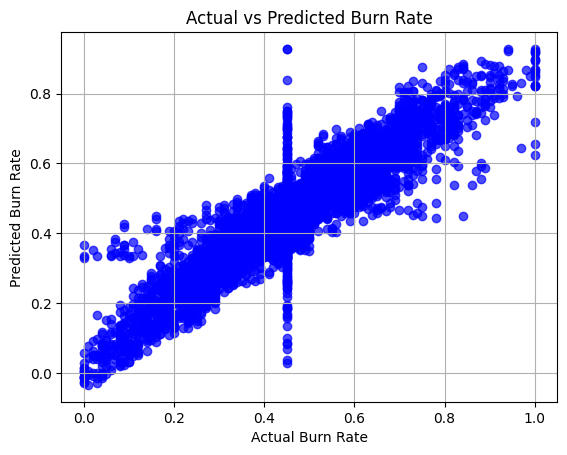

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_excel("/content/updated_new_dataset (2).xlsx")
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'], errors='coerce', dayfirst=True)
if df['Date of Joining'].isnull().sum() > 0:
    print(f"Warning: {df['Date of Joining'].isnull().sum()} invalid date(s) found and set to NaT.")
    df = df.dropna(subset=['Date of Joining'])
df = pd.get_dummies(df, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)
features = ['Designation', 'Resource Allocation', 'Mental Fatigue Score'] + \
           [col for col in df.columns if 'Gender_' in col or 'Company Type_' in col or 'WFH Setup Available_' in col]
target = 'Burn Rate'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Precentage of Accuracy: {100-mae}")
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Actual vs Predicted Burn Rate")
plt.grid(True)
plt.show()